In [2]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from scipy import stats

In [1]:
%matplotlib inline

In [34]:
mask = '/Users/andreaberti/Desktop/tesi/modify_CT/maschera.nii.gz'
mask = np.array(nib.load(mask).get_fdata())

In [35]:
mask.shape

(512, 512, 251)

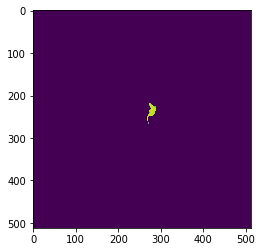

In [36]:
plt.imshow(mask[:, :, 100])

In [37]:
mask = np.swapaxes(mask, 0, 1)

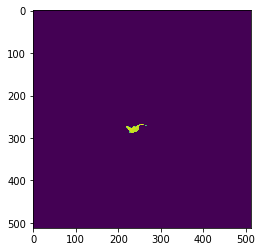

In [45]:
plt.imshow(mask[:, :, 100])

In [14]:
CT = '/Users/andreaberti/Desktop/tesi/pz_per_Aafke/RT_nii/image.nii.gz'
CT = np.array(nib.load(CT).get_fdata())

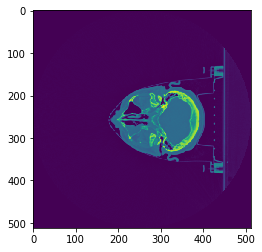

In [23]:
plt.imshow(CT[:, :, 100])

In [40]:
y = nib.load('/Users/andreaberti/Desktop/tesi/pz_per_Aafke/RT_nii/image.nii.gz')

In [7]:
print(y.header)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 251   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        0.9765625 0.9765625 2.        0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 249.51172
qoffset_y       : 516.5117
qoffset_z       :

In [41]:
x_r = nib.Nifti1Image(mask, y.affine, header=y.header)

In [42]:
x_r.to_filename('/Users/andreaberti/Desktop/tesi/modify_CT/maschera_con_header.nii.gz')

In [43]:
import scipy.ndimage

In [47]:
mask_shift = np.copy(mask)

In [65]:
scipy.ndimage.shift(mask, [-15, 0, 0], output=mask_shift, order=3, mode='constant', cval=0.0, prefilter=True);

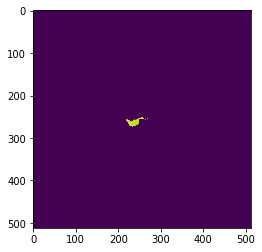

In [66]:
plt.imshow(mask_shift[:, :, 100])

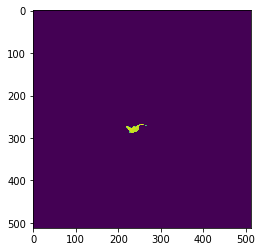

In [57]:
plt.imshow(mask[:, :, 100])

In [67]:
x_shift = nib.Nifti1Image(mask_shift, y.affine, header=y.header)

In [68]:
x_shift.to_filename('/Users/andreaberti/Desktop/tesi/modify_CT/maschera_shift.nii.gz')

In [72]:
intersection = np.copy(mask)

In [73]:
intersection *= mask_shift

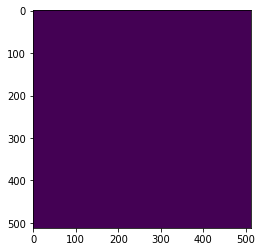

In [76]:
plt.imshow(intersection[:, :, 98])

In [77]:
np.unique(intersection)

array([-2.50339634e-10, -2.14094797e-10, -2.11592356e-10, ...,
        1.24876800e+06,  1.30045500e+06,  1.34915200e+06])

In [79]:
inters = nib.Nifti1Image(intersection, y.affine, header=y.header)

In [80]:
inters.to_filename('/Users/andreaberti/Desktop/tesi/modify_CT/intersection_x_15.nii.gz')